In [ ]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving normalized_aoi_durations - normalized_aoi_durations.csv to normalized_aoi_durations - normalized_aoi_durations.csv


# Upload normalized_AOI_durations.csv

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['normalized_aoi_durations - normalized_aoi_durations.csv']))
print(df.head())

   Unnamed: 0  EyeTrackingID  Snippet        AOI  Duration      IPC  \
0           0             12        1   code 3.9  0.026979  Few IPC   
1           1             12        1  code 3.10  0.008330  Few IPC   
2           2             12        1   code 3.7  0.013378  Few IPC   
3           3             12        1   code 3.1  0.010924  Few IPC   
4           4             12        1   code 3.3  0.006294  Few IPC   

               Category  
0           method call  
1              for loop  
2              for loop  
3      import statement  
4  variable declaration  


# see all unique AOI categories

In [ ]:
print(df['Category'].unique())

['method call' 'for loop' 'import statement' 'variable declaration'
 'if statement' 'method declaration' 'Multiple' 'variable assignment'
 'recursive method call' 'return statement' 'else statement']


# sort by snippet, ID, then category for all data

In [ ]:
#display all data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#group by function
result = df.groupby(['Snippet', 'EyeTrackingID', 'Category'])['Duration'].sum().reset_index()
print(result)



     Snippet  EyeTrackingID               Category  Duration
0          1             12               Multiple  0.000507
1          1             12               for loop  0.021709
2          1             12           if statement  0.007240
3          1             12       import statement  0.010924
4          1             12            method call  0.048948
5          1             12     method declaration  0.004630
6          1             12   variable declaration  0.006496
7          1             13               for loop  0.014008
8          1             13           if statement  0.007996
9          1             13       import statement  0.012833
10         1             13            method call  0.034036
11         1             13     method declaration  0.002352
12         1             13   variable declaration  0.003494
13         1             14               Multiple  0.000133
14         1             14               for loop  0.012459
15         1            

# average all TD durations (ID != 19)

In [ ]:
# Filter out EyeTrackingID 19
df_TD = df[df['EyeTrackingID'] != 19]

# Group by Category and calculate the mean Duration
result = df_TD.groupby(['Snippet', 'Category'])['Duration'].mean().reset_index()

# Sort the result by Category (optional)
result_TD = result.sort_values(['Snippet', 'Category'])

# Step 4: Display the result
print(result_TD)

    Snippet               Category  Duration
0         1               Multiple  0.000227
1         1               for loop  0.008654
2         1           if statement  0.006450
3         1       import statement  0.012553
4         1            method call  0.008911
5         1     method declaration  0.005405
6         1   variable declaration  0.006209
7         2               for loop  0.008689
8         2           if statement  0.005289
9         2     method declaration  0.016685
10        2    variable assignment  0.008458
11        2   variable declaration  0.012264
12        3           if statement  0.017659
13        3            method call  0.018388
14        3     method declaration  0.015828
15        3  recursive method call  0.019966
16        4               Multiple  0.003684
17        4         else statement  0.009708
18        4               for loop  0.007388
19        4           if statement  0.008994
20        4            method call  0.010801
21        

# get ADHD duration


In [ ]:
# Filter out EyeTrackingID 19
df_ADHD = df[df['EyeTrackingID'] == 19]

# Group by Category and calculate the mean Duration
result = df_ADHD.groupby(['Snippet', 'Category'])['Duration'].mean().reset_index()

# Sort the result by Category (optional)
result_ADHD = result.sort_values(['Snippet', 'Category'])

# Step 4: Display the result
print(result_ADHD)

    Snippet               Category  Duration
0         1               Multiple  0.000672
1         1               for loop  0.010514
2         1           if statement  0.012195
3         1       import statement  0.005240
4         1            method call  0.008758
5         1     method declaration  0.005193
6         1   variable declaration  0.006335
7         2               for loop  0.007497
8         2           if statement  0.007429
9         2     method declaration  0.019374
10        2    variable assignment  0.011273
11        2   variable declaration  0.009611
12        3           if statement  0.011372
13        3            method call  0.041571
14        3     method declaration  0.013911
15        3  recursive method call  0.020218
16        4               Multiple  0.005671
17        4         else statement  0.001739
18        4               for loop  0.004526
19        4           if statement  0.005899
20        4            method call  0.014092
21        

# load them into one dataframe

In [ ]:
#Create data frames from each
df_TD = pd.DataFrame(result_TD)
df_ADHD = pd.DataFrame(result_ADHD)

# Add the 'Participant' column
df_TD['Participant'] = 'TD'
df_ADHD['Participant'] = 'ADHD'

# Concatenate the DataFrames
combined_df = pd.concat([df_TD, df_ADHD], ignore_index=True)

In [ ]:
print(combined_df)

    Snippet               Category  Duration Participant
0         1               Multiple  0.000227          TD
1         1               for loop  0.008654          TD
2         1           if statement  0.006450          TD
3         1       import statement  0.012553          TD
4         1            method call  0.008911          TD
5         1     method declaration  0.005405          TD
6         1   variable declaration  0.006209          TD
7         2               for loop  0.008689          TD
8         2           if statement  0.005289          TD
9         2     method declaration  0.016685          TD
10        2    variable assignment  0.008458          TD
11        2   variable declaration  0.012264          TD
12        3           if statement  0.017659          TD
13        3            method call  0.018388          TD
14        3     method declaration  0.015828          TD
15        3  recursive method call  0.019966          TD
16        4               Multi

# Upload AOI master doc

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import numpy as np
uploaded = files.upload()

Saving aoi_duration - Sheet1.csv to aoi_duration - Sheet1.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['aoi_duration - Sheet1.csv']))
print(df.head())

   Snippet Participant  for loop  if statement  else statement  \
0        1        ADHD  0.010514      0.012195             NaN   
1        1          TD  0.008654      0.006450             NaN   
2        2        ADHD  0.007497      0.007429             NaN   
3        2          TD  0.008689      0.005289             NaN   
4        3        ADHD       NaN      0.011372             NaN   

   import statement  method call  method declaration  recursive method call  \
0          0.005240     0.008758            0.005193                    NaN   
1          0.012553     0.008911            0.005405                    NaN   
2               NaN          NaN            0.019374                    NaN   
3               NaN          NaN            0.016685                    NaN   
4               NaN     0.041571            0.013911               0.020218   

   Multiple  return statement  variable assignment  variable declaration  
0  0.000672               NaN                  NaN   

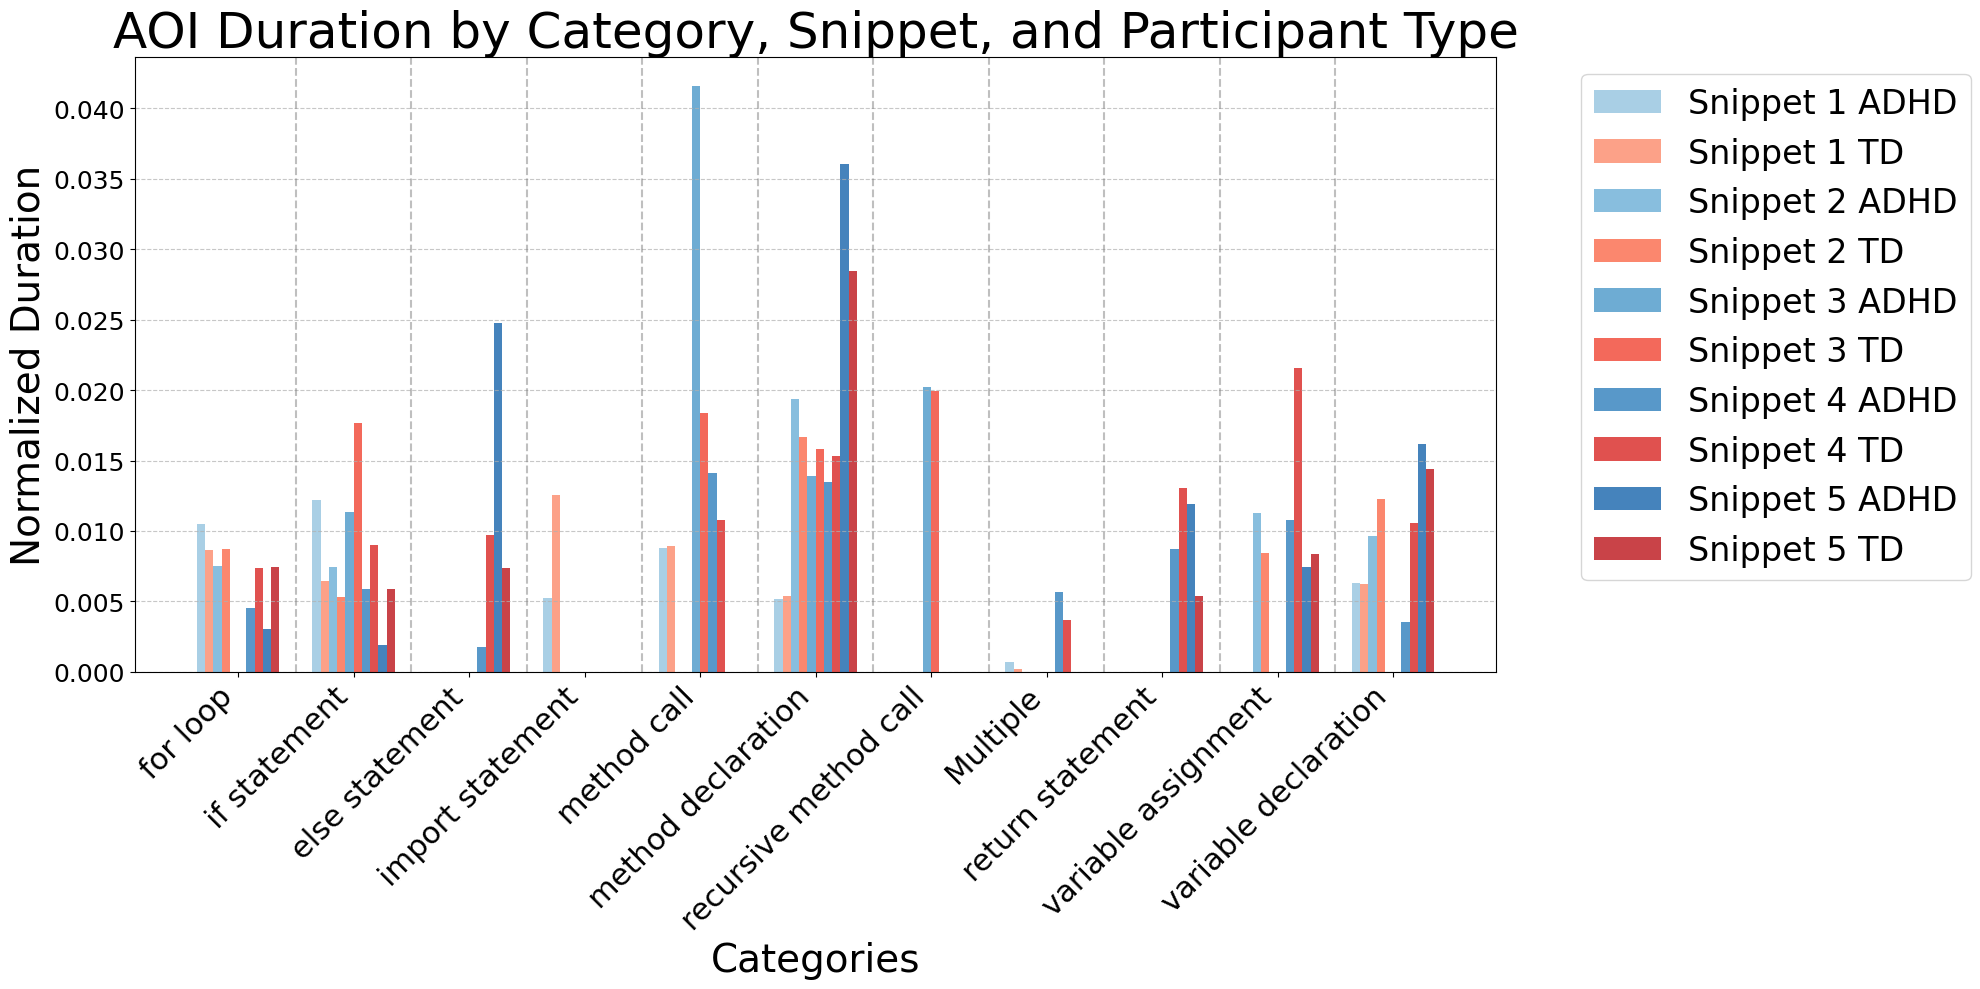

In [ ]:
# Define categories and snippets
categories = ['for loop', 'if statement', 'else statement', 'import statement', 'method call',
              'method declaration', 'recursive method call', 'Multiple', 'return statement',
              'variable assignment', 'variable declaration']
snippets = df['Snippet'].unique()

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Define bar width and positions
bar_width = 0.1
n_bars = len(snippets) * 2
category_width = n_bars * bar_width + 0.4  # Add extra space between categories
index = np.arange(len(categories)) * category_width

# Define color shades
red_shades = plt.cm.Reds(np.linspace(0.4, 0.8, len(snippets)))
blue_shades = plt.cm.Blues(np.linspace(0.4, 0.8, len(snippets)))

# Plot bars for each snippet and participant type
for i, snippet in enumerate(snippets):
    adhd_data = df[(df['Snippet'] == snippet) & (df['Participant'] == 'ADHD')].iloc[0, 2:].values
    td_data = df[(df['Snippet'] == snippet) & (df['Participant'] == 'TD')].iloc[0, 2:].values

    x = index + (i * 2 * bar_width) - ((n_bars - 1) * bar_width / 2)
    ax.bar(x, adhd_data, bar_width, label=f'Snippet {snippet} ADHD', color=blue_shades[i], alpha=0.8)
    ax.bar(x + bar_width, td_data, bar_width, label=f'Snippet {snippet} TD', color=red_shades[i], alpha=0.8)

# Add vertical lines between categories
for i in range(1, len(categories)):
    ax.axvline(x=index[i] - category_width/2, color='gray', linestyle='--', alpha=0.5)

# Customize the plot
ax.set_xlabel('Categories', fontsize=28)
ax.set_ylabel('Normalized Duration', fontsize=28)
ax.set_title('AOI Duration by Category, Snippet, and Participant Type', fontsize=36)
ax.set_xticks(index)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=22)
ax.tick_params(axis='y', labelsize=18)

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=24)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# create heart rate violin plot


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
import numpy as np
uploaded = files.upload()

Saving heart rate  - Sheet1 (1).csv to heart rate  - Sheet1 (1).csv


In [ ]:
df = pd.read_csv('heart rate  - Sheet1 (1).csv', skiprows=1)
avgHR_data = pd.read_csv('avgHR - Sheet1.csv')

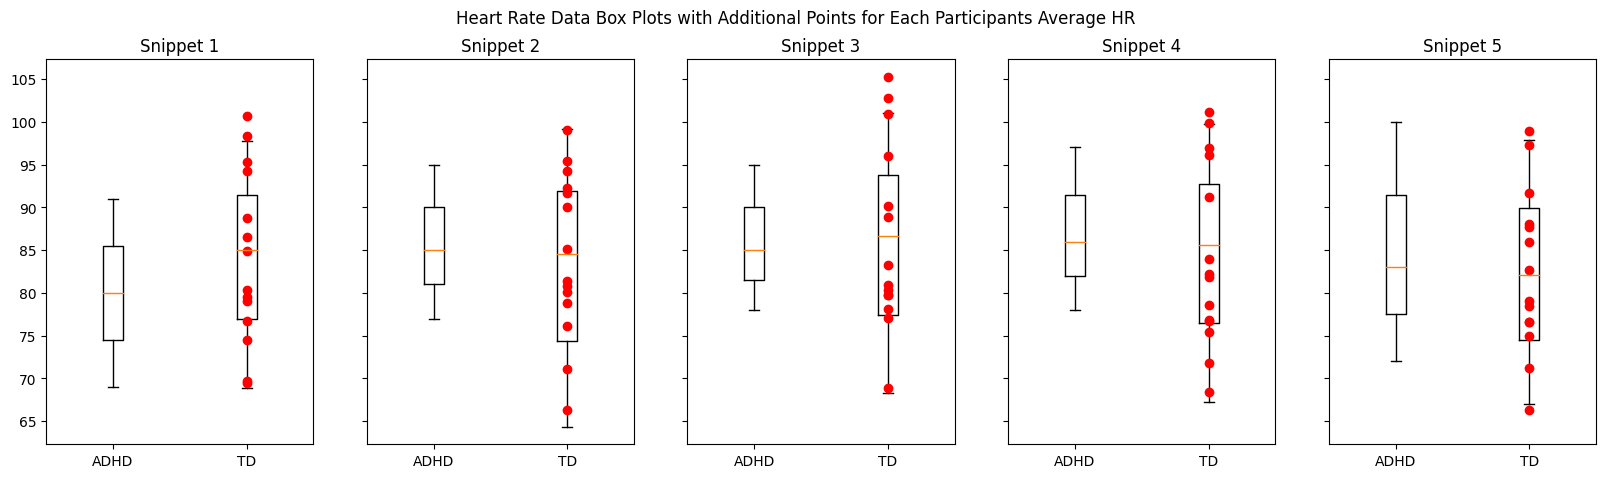

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the provided snippets
data = {
    'Snippet 1': {
        'ADHD': [69, 74.5, 80, 85.5, 91],
        'Typically Developing': [68.92857143, 76.96428571, 85, 91.39285714, 97.78571429]
    },
    'Snippet 2': {
        'ADHD': [77, 81, 85, 90, 95],
        'Typically Developing': [64.35714286, 74.42857143, 84.5, 91.85714286, 99.21428571]
    },
    'Snippet 3': {
        'ADHD': [78, 81.5, 85, 90, 95],
        'Typically Developing': [68.28571429, 77.46428571, 86.64285714, 93.82142857, 101]
    },
    'Snippet 4': {
        'ADHD': [78, 82, 86, 91.5, 97],
        'Typically Developing': [67.28571429, 76.46428571, 85.64285714, 92.71428571, 99.78571429]
    },
    'Snippet 5': {
        'ADHD': [72, 77.5, 83, 91.5, 100],
        'Typically Developing': [67, 74.53571429, 82.07142857, 89.96428571, 97.85714286]
    }
}

# Additional points to plot
additional_points = {
    'Snippet 1': avgHR_data['snippet_1_HeartRateAvg'].tolist(),
    'Snippet 2': avgHR_data['snippet_2_HeartRateAvg'].tolist(),
    'Snippet 3': avgHR_data['snippet_3_HeartRateAvg'].tolist(),
    'Snippet 4': avgHR_data['snippet_4_HeartRateAvg'].tolist(),
    'Snippet 5': avgHR_data['snippet_5_HeartRateAvg'].tolist(),
}

# Create box plots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, (snippet, values) in enumerate(data.items()):
    # Create box plot
    box = axes[i].boxplot([values['ADHD'], values['Typically Developing']], labels=['ADHD', 'TD'])

    # Plot additional points for 'Typically Developing'
    axes[i].plot([2]*len(additional_points[snippet]), additional_points[snippet], 'ro')  # 'ro' means red color, circle markers

    # Set title for each subplot
    axes[i].set_title(snippet)

plt.suptitle('Heart Rate Data Box Plots with Additional Points for Each Participants Average HR')
plt.show()